* 一维插值
![](./img/Snipaste_2025-07-07_14-06-32.png)

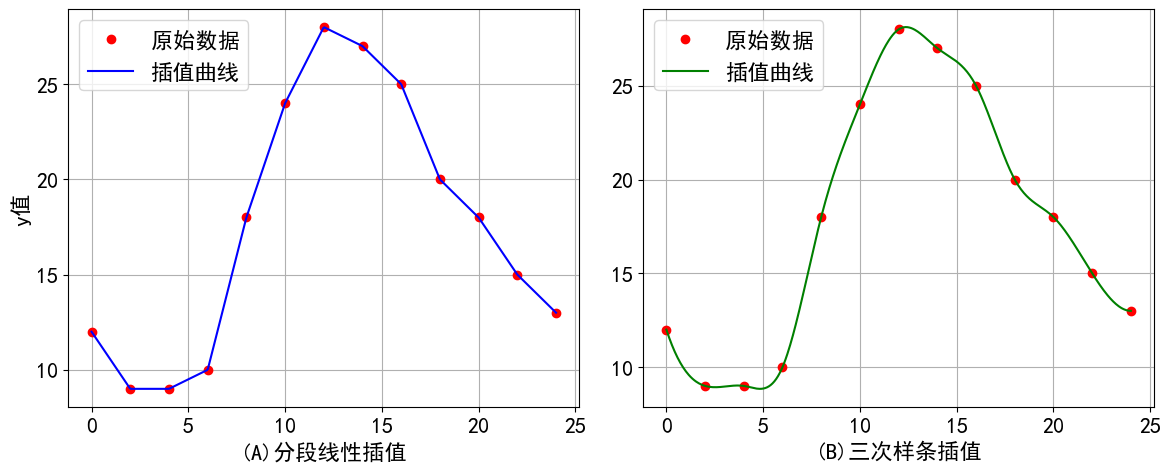

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d  # 注意这里是数字1，不是字母l

# 原始数据
x = np.arange(0, 25, 2)
y = np.array([12, 9, 9, 10, 18, 24, 28, 27, 25, 20, 18, 15, 13])

# 生成密集插值点
xnew = np.linspace(0, 24, 500)  #这里的意思是在0-24这个区间内生成500个点

# 创建插值函数
f1 = interp1d(x, y, kind='linear')  # 分段线性插值
y1 = f1(xnew)

f2 = interp1d(x, y, kind='cubic')   # 三次样条插值
y2 = f2(xnew)

# 设置图形样式
plt.rc('font', size=16, family='SimHei')
plt.figure(figsize=(12, 5))  # 调整图形大小

# 绘制第一个子图 - 线性插值
plt.subplot(121)
plt.plot(x, y, 'ro', label='原始数据')  # 添加原始数据点
plt.plot(xnew, y1, 'b-', label='插值曲线')
plt.xlabel("(A)分段线性插值")
plt.ylabel("y值")
plt.legend()
plt.grid(True)

# 绘制第二个子图 - 三次样条插值
plt.subplot(122)
plt.plot(x, y, 'ro', label='原始数据')  # 添加原始数据点
plt.plot(xnew, y2, 'g-', label='插值曲线')
plt.xlabel("(B)三次样条插值")
plt.legend()
plt.grid(True)

# 保存和显示图形
plt.tight_layout()  # 自动调整子图间距
plt.savefig("figure.png", dpi=500, bbox_inches='tight')  # 提高保存质量
plt.show()

* 二维网格节点插值
![](./img/Snipaste_2025-07-07_19-56-47.png)

区域的面积为：4782742.72 平方单位


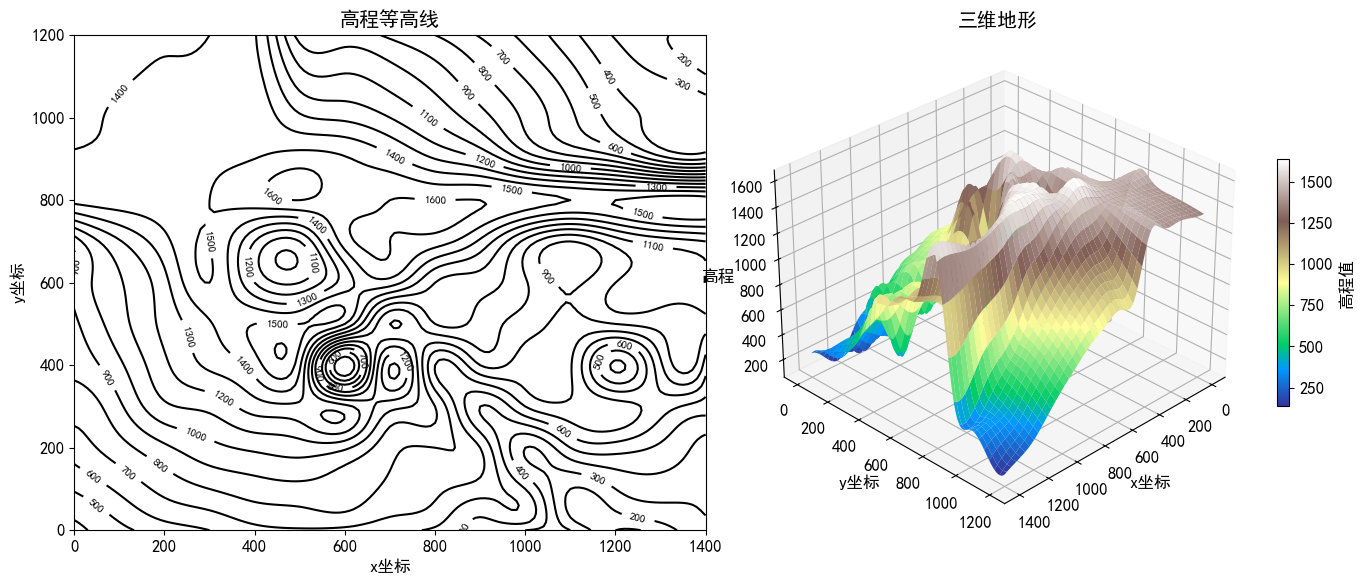

In [3]:
# 程序文件名 Pex7_5_updated.py
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.interpolate import RegularGridInterpolator


 
# 高程数据（根据表7.3）
z_data = np.array([
    [1350, 1370, 1390, 1400, 1410,  960,  940,  880,  800,  690,  570,  430,  290,  210,  150],
    [1370, 1390, 1410, 1430, 1440, 1140, 1110, 1050,  950,  820,  690,  540,  380,  300,  210],
    [1380, 1410, 1430, 1450, 1470, 1320, 1280, 1200, 1080,  940,  780,  620,  460,  370,  350],
    [1420, 1430, 1450, 1480, 1500, 1550, 1510, 1430, 1300, 1200,  980,  850,  750,  550,  500],
    [1430, 1450, 1460, 1500, 1550, 1600, 1550, 1600, 1600, 1600, 1550, 1500, 1500, 1550, 1550],
    [ 950, 1190, 1370, 1500, 1200, 1100, 1550, 1600, 1550, 1380, 1070,  900, 1050, 1150, 1200],
    [ 910, 1090, 1270, 1500, 1200, 1100, 1350, 1450, 1200, 1150, 1010,  880, 1000, 1050, 1100],
    [ 880, 1060, 1230, 1390, 1500, 1500, 1400,  900, 1100, 1060,  950,  870,  900,  936,  950],
    [ 830,  980, 1180, 1320, 1450, 1420,  400, 1300,  700,  900,  850,  810,  380,  780,  750],
    [ 740,  880, 1080, 1130, 1250, 1280, 1230, 1040,  900,  500,  700,  780,  750,  650,  550],
    [ 650,  760,  880,  970, 1020, 1050, 1020,  830,  800,  700,  300,  500,  550,  480,  350],
    [ 510,  620,  730,  800,  850,  870,  850,  780,  720,  650,  500,  200,  300,  350,  320],
    [ 370,  470,  550,  600,  670,  690,  670,  620,  580,  450,  400,  300,  100,  150,  250]
])

# 定义原始坐标网格
x = np.arange(0, 1500, 100)      # 0, 100, ..., 1400
y = np.arange(1200, -100, -100)  # 1200, 1100, ..., 0

# 创建插值器（使用三次样条）
interp = RegularGridInterpolator(
    (y, x),  # 注意：y在前因为数据是y方向优先排列
    z_data,
    method='cubic',
    bounds_error=False,
    fill_value=None
)

# 生成密集网格
xn = np.linspace(0, 1400, 141)  # 0, 10, ..., 1400
yn = np.linspace(0, 1200, 121)  # 0, 10, ..., 1200
X, Y = np.meshgrid(xn, yn)

# 准备插值点（需要(y,x)格式）
points = np.column_stack((Y.ravel(), X.ravel()))

# 执行插值
zn = interp(points).reshape(121, 141)

# 计算区域面积
def triangle_area(a, b, c):
    ab = norm(b-a)
    bc = norm(c-b)
    ac = norm(c-a)
    L = (ab + bc + ac)/2
    return np.sqrt(L*(L-ab)*(L-bc)*(L-ac))

s = 0
for i in range(len(xn)-1):
    for j in range(len(yn)-1):
        p1 = np.array([xn[i], yn[j], zn[j, i]])
        p2 = np.array([xn[i+1], yn[j], zn[j, i+1]])
        p3 = np.array([xn[i+1], yn[j+1], zn[j+1, i+1]])
        p4 = np.array([xn[i], yn[j+1], zn[j+1, i]])
        
        s += triangle_area(p1, p2, p3) + triangle_area(p1, p3, p4)

print(f"区域的面积为：{s:.2f} 平方单位")

# 可视化
plt.rc('font', size=16, family='SimHei')
plt.figure(figsize=(14, 6))

# 等高线图
plt.subplot(121)
contour = plt.contour(X,Y,zn,levels=15,colors='k')
plt.clable(contour,inline=True,fontsize=9)
plt.xlable('x坐标')
plt.ylable('y坐标')
plt.title('高程等高线')

# 三维曲面图
ax = plt.subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, zn, cmap='terrain', rstride=3, cstride=3) 
#cmap这个参数用来表明使用地形专用配色（低值绿色→高值棕色），而rstride和cstride是自变量的步长
plt.colorbar(surf, shrink=0.5, label='高程值')
#shrink这个参数来表示图右边的这个颜色条的百分比,怎么舒服怎么来
ax.set_xlabel('x坐标')
ax.set_ylabel('y坐标')
ax.set_zlabel('高程')
ax.view_init(30, 45)
plt.title('三维地形')

 
plt.tight_layout()
plt.savefig('terrain_analysis.png', dpi=300)
plt.show()

* 二维乱点插图
![](./img/Snipaste_2025-07-07_20-33-06.png)

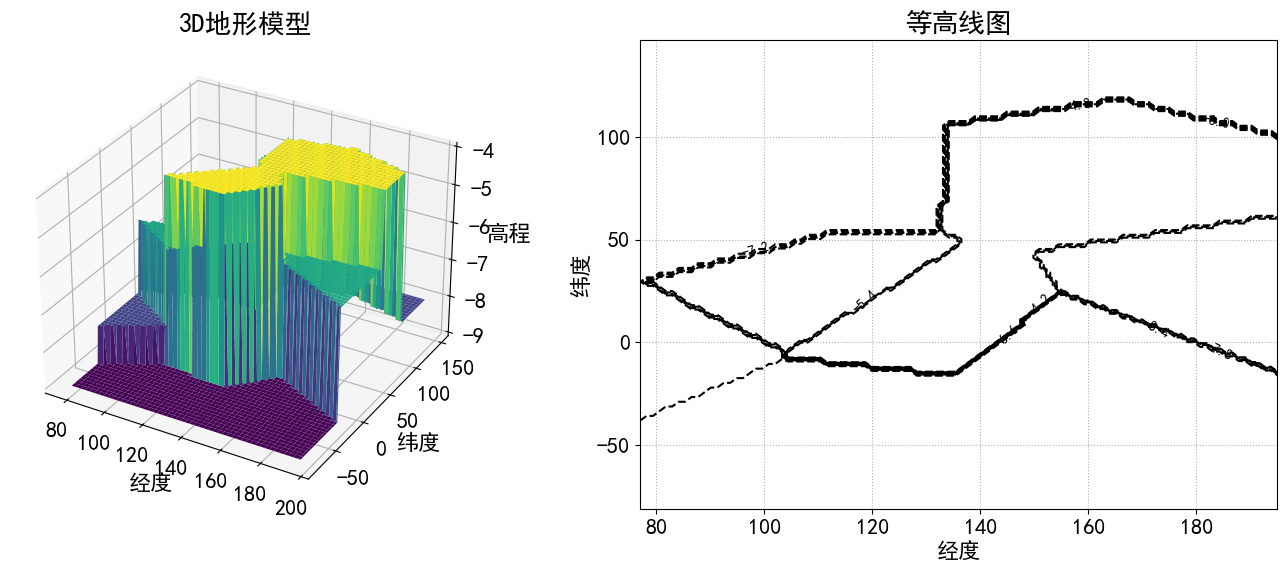

In [8]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
#注意这里griddata是用于散点的插值，而RegularGridInterpolator适用于规格网格数据

# 原始数据输入
x = np.array([129,140,103.5,88,185.5,195,105,157.5,107.5,77,81,162,162,117.5])
y = np.array([7.5,141.5,23,147,22.5,137.5,85.5,-6.5,-81,3,56.5,-66.5,84,-33.5])
z = -np.array([4,8,6,8,6,8,8,9,9,8,8,9,4,9])

# 数据预处理
xy = np.vstack([x, y]).T

# 创建插值网格
xn = np.linspace(x.min(), x.max(), 100)
yn = np.linspace(y.min(), y.max(), 100)
xng, yng = np.meshgrid(xn, yn)
zn = griddata(xy, z, (xng, yng), method='nearest')

# 字体设置优化（解决MINUS SIGN警告）
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 可视化设置
plt.figure(figsize=(14, 6))

# 3D曲面图
ax = plt.subplot(121, projection='3d')
surf = ax.plot_surface(xng, yng, zn, 
                      cmap='viridis',
                      rstride=2, cstride=2,
                      linewidth=0.5,
                      antialiased=True)
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_zlabel('高程')
ax.set_title('3D地形模型')

# 等高线图
plt.subplot(122)
contour = plt.contour(xn, yn, zn, levels=8, colors='black')
plt.clabel(contour, inline=True, fontsize=10)
plt.xlabel('经度')
plt.ylabel('纬度')
plt.title('等高线图')
plt.grid(linestyle=':')

plt.tight_layout()
plt.savefig('terrain.png', dpi=300, bbox_inches='tight')
plt.show()


#### 通过以上你可以明白，在不同情况下模型的使用，一个是规则的网格点情况下，数据十分充分完整规则，这时候就使用网格节点插值以及RegularGridInterpolate。相反，如果在离散随机的点数据下，我们就需要使用griddata